In [1]:
from json import load
from pathlib import PurePath
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as s
import wordcloud as wordcloud
from wordcloud import STOPWORDS
from PIL import Image
import json

In [6]:
user_json_path = PurePath("../../data/user_json_files/")
user_raw_path = PurePath("../../data/clarkson2_files/")
user_list = [user for user in os.listdir(user_raw_path) if user != ".DS_Store"]

In [15]:
ocnt = "occurence_count"
tvec = "timing_vectors"

aggregator = {}
for i in range(len(user_list)):
    path_to_user = PurePath(user_json_path, PurePath(f"user_{user_list[i]}.json"))

    with open(path_to_user, "r") as f:
        user_dict = load(f)
        
    for word in user_dict:
        if word not in aggregator:
            aggregator[word] = user_dict[word][ocnt]

        else:
            aggregator[word] += user_dict[word][ocnt]

print(aggregator)

    
    #user_dict.update(user_dict)






{'HOW': 2247, 'T': 13354, 'MAIL': 265, 'GOOGLE': 349, 'JOHN': 136, 'MATTICK': 8, 'FCHAPTER': 2, 'PROBLEM': 419, 'E': 10953, 'DRUID': 21, 'SYSTEM': 626, 'LOD': 10, 'GGER': 2, 'KEYST': 1, 'TROI': 17, 'XX': 203, 'SO': 2977, 'THIS': 6070, 'THING': 544, 'WILL': 2816, 'LOG': 214, 'EVERYTHING': 184, 'THAT': 9216, 'I': 26271, 'TYPE': 321, 'NEATO': 2, 'X': 6742, 'XXX': 110, 'XXXXXX': 8, 'XXXX': 37, 'XXXXX': 21, 'Z': 6290, 'XXXXXXXXX': 3, 'SD': 588, 'DWD': 55, 'GAMEPAD': 1, 'MOE': 28, 'DE': 1047, 'A': 30579, 'FOR': 9815, 'SUPERCRATE': 1, 'BOTX': 1, 'TED': 130, 'YOU': 9001, 'HAVE': 4799, 'CONTRIBUTED': 23, 'KEYSTROKES': 31, 'BEFORE': 565, 'SESSION': 70, 'LO': 126, 'KEYSTROKE': 46, 'LOGGER': 42, 'TO': 26158, 'REFRESH': 4, 'THE': 41324, 'KEY': 213, 'COUND': 3, 'ON': 6442, 'SOFE': 1, 'TWARE': 4, 'TEXT': 222, 'ADVENTURE': 30, 'GAMES': 219, 'LINE': 368, 'PPPPPPPPPP': 1, 'XXXXXXX': 1, 'XXXXXXXX': 1, 'XXXXXXXXXX': 2, 'S': 22865, 'NOTES': 111, 'MATH': 85, 'CLASS': 616, 'LAPLACE': 11, 'EQUATIONIN': 1, 'IN

In [9]:
word_occurences = [(key, user_dict[key][ocnt]) for key in user_dict]
word_occurences

[('HOW', 32),
 ('T', 97),
 ('MAIL', 8),
 ('GOOGLE', 9),
 ('JOHN', 8),
 ('MATTICK', 8),
 ('FCHAPTER', 1),
 ('PROBLEM', 22),
 ('E', 153),
 ('DRUID', 2),
 ('SYSTEM', 5),
 ('LOD', 1),
 ('GGER', 1),
 ('KEYST', 1),
 ('TROI', 1),
 ('XX', 140),
 ('SO', 26),
 ('THIS', 71),
 ('THING', 2),
 ('WILL', 67),
 ('LOG', 1),
 ('EVERYTHING', 5),
 ('THAT', 79),
 ('I', 121),
 ('TYPE', 2),
 ('NEATO', 1),
 ('X', 1017),
 ('XXX', 81),
 ('XXXXXX', 7),
 ('XXXX', 30),
 ('XXXXX', 16),
 ('Z', 37),
 ('XXXXXXXXX', 3),
 ('SD', 6),
 ('DWD', 1),
 ('GAMEPAD', 1),
 ('MOE', 1),
 ('DE', 6),
 ('A', 294),
 ('FOR', 89),
 ('SUPERCRATE', 1),
 ('BOTX', 1),
 ('TED', 2),
 ('YOU', 36),
 ('HAVE', 43),
 ('CONTRIBUTED', 2),
 ('KEYSTROKES', 1),
 ('BEFORE', 4),
 ('SESSION', 2),
 ('LO', 2),
 ('KEYSTROKE', 3),
 ('LOGGER', 2),
 ('TO', 242),
 ('REFRESH', 1),
 ('THE', 568),
 ('KEY', 5),
 ('COUND', 1),
 ('ON', 53),
 ('SOFE', 1),
 ('TWARE', 1),
 ('TEXT', 4),
 ('ADVENTURE', 2),
 ('GAMES', 6),
 ('LINE', 5),
 ('PPPPPPPPPP', 1),
 ('XXXXXXX', 1),
 ('

In [14]:
sorted_word_occurences = sorted(tuple(filter(lambda x: len(x[0]) > 1, [(key, user_dict[key][ocnt]) for key in user_dict])), key = lambda x: x[1], reverse=True)
word = [f"{sorted_word_occurences[i][0]} "*(sorted_word_occurences[i][1]) for i in range(len(sorted_word_occurences))]
concat = "".join(word)
text_write = open("test.txt", "w")
text_to_file = text_write.write(concat)
text_write.close()
#concat


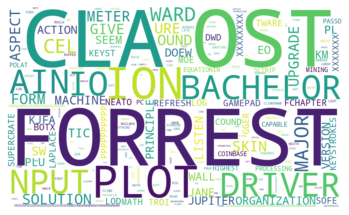

In [13]:
#word cloud with txt file 
text = open('test.txt').read()
stop_words = ["xxxx", "xxx", "xx","xxxxx"]
wc = wordcloud.WordCloud(collocations= False, background_color='white', height = 600, width = 1000, stopwords= stop_words)
wc.generate(text)

# save to file
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show
wc.to_file('wordcloud_output.png')


